In [1]:
#Let's start with connecting the Google colab to my Google Drive acount in order to import the dataset.

from google.colab import drive

drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/My Drive/athlete_events.csv')

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.shape

(271116, 15)

In [6]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
df.info()

#.info() is used to see the missing values.

#Here we have missing values in the Age, Height,Weight and Medal columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [9]:
#With .describe()count row, we can see again that the Age, Height, Weight has some missing (N/A)values. 

df.describe()

#We can check this also by comparing their values with ID and year columns.

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
#"usecols" command brings the desired columns.

df_new_df = pd.read_csv(r"/content/drive/My Drive/athlete_events.csv", usecols=["Games", "Year", "Season"])

df_new_df.head(2)

,Games,Year,Season
0,1992 Summer,1992,Summer
1,2012 Summer,2012,Summer


In [11]:
#Games column will be removed because it contains the same information with the combination of year & season columns.

df.drop('Games', inplace=True, axis=1)

#"axis=1" means the removed part will be a column. 
#"inplace=True" command make the changes taking place permenantly.

df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [12]:
#We can use ID information as our index paramter.

df.set_index('ID',inplace=True)
df.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [13]:
#rename() is used for changing the name of column.

df.rename(columns={"NOC":"National_Olympic_Committees"}, inplace=True)

df.head(2)

,Name,Sex,Age,Height,Weight,Team,National_Olympic_Committees,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


Extra information;
National Olympic Committee (NOC) is a national constituent of the worldwide Olympic movement. Subject to the controls of the International Olympic Committee, NOCs are responsible for organizing their people's participation in the Olympic Games.

In [14]:
#We can combine 2 columns into 1 column. It will appear at the end of column list.

df["Team_country"] = df.Team + " / " + df.National_Olympic_Committees
df.head(2)

,Name,Sex,Age,Height,Weight,Team,National_Olympic_Committees,Year,Season,City,Sport,Event,Medal,Team_country
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China / CHN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China / CHN


In [15]:
#Dropping of the National Olympic Committees column will be done with .done(); 

df.drop('National_Olympic_Committees', inplace=True, axis=1)

df.head(2)

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal,Team_country
ID,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China / CHN
2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China / CHN


In [16]:
#We can see if there is a missing values in our dataframe.

df.isnull().values.any()

True

In [17]:
#We can see which columns has missing values with .isnull() command.

df.isnull()

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal,Team_country
ID,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,True,False,False,False,False,False,False,True,False
4,False,False,False,True,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135569,False,False,False,False,False,False,False,False,False,False,False,True,False
135570,False,False,False,False,False,False,False,False,False,False,False,True,False
135570,False,False,False,False,False,False,False,False,False,False,False,True,False


At first sight, we saw Height, Weight and Medal columns have missing values. What about the other columns?

In [18]:
#We can see how many missing values we have in each column;

df.isnull().sum()

Name                 0
Sex                  0
Age               9474
Height           60171
Weight           62875
Team                 0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           231333
Team_country         0
dtype: int64

I will make some analysis with "Age" information. Therefore, there must be no missing values in that column.


In [19]:
#With dropna(), we drop missing values from Age column;

print("Total missing values before deleting them: ", pd.isnull(df.Age).sum())
print("Total number of rows: ", df.shape[0])

#df.shape[0] return number of rows, and we can check if a column is empty

df.dropna(subset=["Age"], axis=0, inplace=True)

print("Total missing values after deleting them: ", pd.isnull(df.Age).sum())
print("Total number of rows: ", df.shape[0])

Total missing values before deleting them:  9474
Total number of rows:  271116
Total missing values after deleting them:  0
Total number of rows:  261642


In [20]:
#Since we dropped the rows that contain NaN values, the number of rows drastically decreased 
#from 271116 to 261642.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261642 entries, 1 to 135571
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Name          261642 non-null  object 
 1   Sex           261642 non-null  object 
 2   Age           261642 non-null  float64
 3   Height        210068 non-null  float64
 4   Weight        207379 non-null  float64
 5   Team          261642 non-null  object 
 6   Year          261642 non-null  int64  
 7   Season        261642 non-null  object 
 8   City          261642 non-null  object 
 9   Sport         261642 non-null  object 
 10  Event         261642 non-null  object 
 11  Medal         39051 non-null   object 
 12  Team_country  261642 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 27.9+ MB


In [21]:
#Finding mean Age;

df.Age.mean()

25.556898357297374

In [22]:
#We can group the age of people based on their sex.

df.groupby("Sex")["Age"].value_counts()

Sex  Age 
F    21.0    5511
     23.0    5447
     22.0    5416
     24.0    5291
     25.0    4950
             ... 
M    10.0       1
     11.0       1
     84.0       1
     96.0       1
     97.0       1
Name: Age, Length: 136, dtype: int64

**Question: Which gender does attend the Olympics more?**

In [23]:
#We can see the comparision of minimum, maximum and mean ages of female and male olympic participants.

df.groupby("Sex").Age.agg(["count", "min", "max", "mean"])

,count,min,max,mean
Sex,,,,
F,74098,11.0,74.0,23.732881
M,187544,10.0,97.0,26.277562


In [24]:
#The same information can be gathered by size() command

df.groupby("Sex").size()

Sex
F     74098
M    187544
dtype: int64

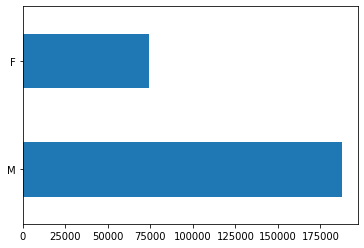

In [25]:
#We can visualize the number of female and male participants with bar plot.

df["Sex"].value_counts().plot.barh()

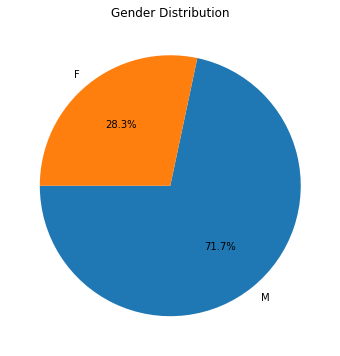

In [26]:
# The percentage of female and male participants can be seen with this pie chart.

Sex_count = df.Sex.value_counts()

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(Sex_count, labels=Sex_count.index, autopct='%1.1f%%', startangle=180);


**Result: The attendance of females is 2.5 times less than male attendees.**

In [27]:
#Now I would like to see how many female candidates participated to the olympic games in the last 5 year.

female = df[df.Sex=='F'][['Sex','Year']]
female = female.groupby('Year').count().reset_index()
female.tail(5)

,Year,Sex
29,2008,5814
30,2010,1847
31,2012,5815
32,2014,2023
33,2016,6223


In [28]:
#Same information for the male participants.

male = df[df.Sex=='M'][['Sex','Year']]
male = male.groupby('Year').count().reset_index()
male.tail(5)

,Year,Sex
30,2008,7786
31,2010,2555
32,2012,7105
33,2014,2868
34,2016,7465


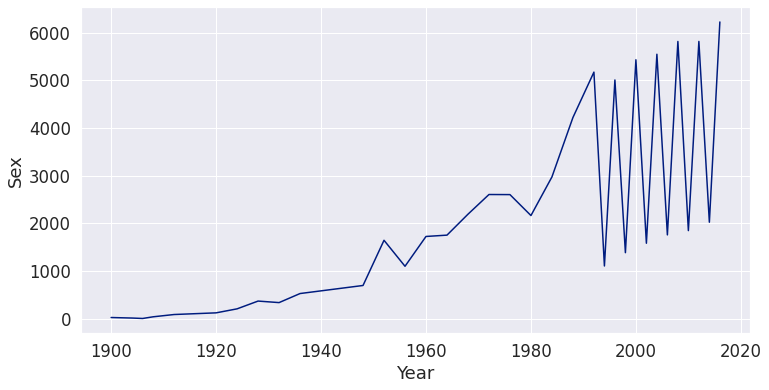

In [114]:
#We can see the change of the number of female participants over the years with the following code lines;

plt.figure(figsize=(12,6))

sns.lineplot(data=female, x="Year", y="Sex");

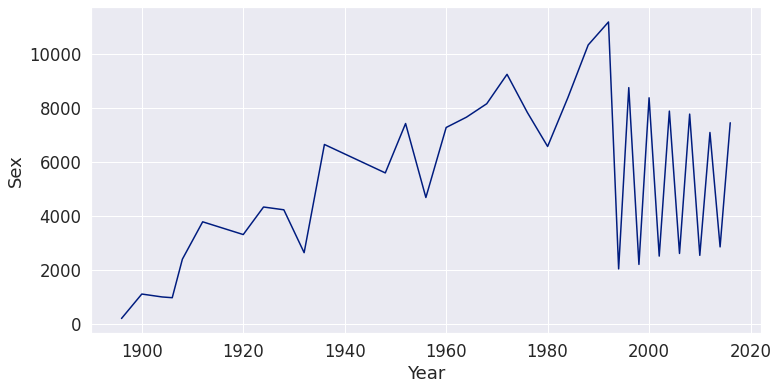

In [115]:
#We will bring the same information for male participants;

plt.figure(figsize=(12,6))

sns.lineplot(data=male, x="Year", y="Sex");

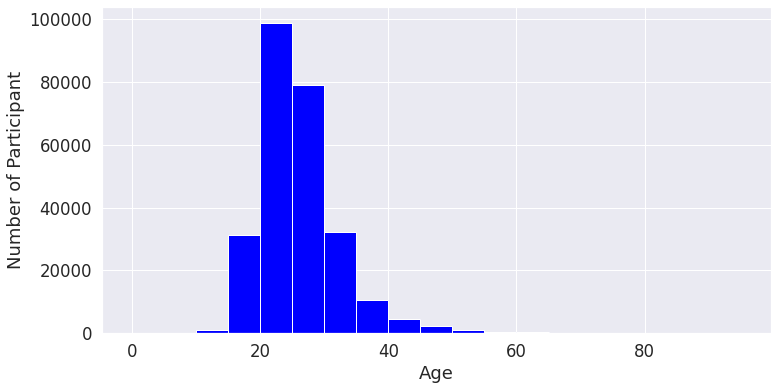

In [116]:
#We can find the average age as;

plt.figure(figsize=(12, 6))

plt.xlabel('Age')
plt.ylabel('Number of Participant')

plt.hist(df.Age, bins=np.arange(0,100,5), color='blue');

**Question: Who is the oldest and youngest olympians?**

In [32]:
#Let's find who is the oldest person in the Olympics;

max_Age = df.Age.max()
max_Age

Age_list = df[(df.Age == max_Age)]
Age_list


,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal,Team_country
ID,,,,,,,,,,,,,
128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,United States / USA


In [33]:
#Let's see who is the youngest person in the Olympics;

min_Age = df.Age.min()
min_Age

Age_list = df[(df.Age == min_Age)]
Age_list.head()

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal,Team_country
ID,,,,,,,,,,,,,
71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Ethnikos Gymnastikos Syllogos / GRE


**Question: How many people did get the Bronze medal in Gymnastics same as Dimitrios Loundras who is the youngest Olympics participant at the same time & same place?**


In [101]:
bronze_winner = df[(df.Year == 1896) & (df.Medal=='Bronze') & (df.City == 'Athina')& (df.Sport == 'Gymnastics')]
bronze_winner = bronze_winner[['Sport','Medal']].groupby('Sport').count()
bronze_winner.reset_index(inplace=True)
Top_sports = bronze_winner.sort_values('Medal', ascending=False)
Top_sports.head()

,Sport,Medal
0,Gymnastics,3


#Filling the missing values 

In [35]:
#Let's check weight column.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261642 entries, 1 to 135571
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Name          261642 non-null  object 
 1   Sex           261642 non-null  object 
 2   Age           261642 non-null  float64
 3   Height        210068 non-null  float64
 4   Weight        207379 non-null  float64
 5   Team          261642 non-null  object 
 6   Year          261642 non-null  int64  
 7   Season        261642 non-null  object 
 8   City          261642 non-null  object 
 9   Sport         261642 non-null  object 
 10  Event         261642 non-null  object 
 11  Medal         39051 non-null   object 
 12  Team_country  261642 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 27.9+ MB


In [36]:
#We can fill the missing values in Weight column with mean values by using fillna()

print("Total missing values before filling: ", pd.isnull(df.Weight).sum())

df["Weight"].fillna(df["Weight"].mean(), inplace = True)

print("Total missing values after filling: ",  pd.isnull(df.Weight).sum())

Total missing values before filling:  54263
Total missing values after filling:  0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261642 entries, 1 to 135571
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Name          261642 non-null  object 
 1   Sex           261642 non-null  object 
 2   Age           261642 non-null  float64
 3   Height        210068 non-null  float64
 4   Weight        261642 non-null  float64
 5   Team          261642 non-null  object 
 6   Year          261642 non-null  int64  
 7   Season        261642 non-null  object 
 8   City          261642 non-null  object 
 9   Sport         261642 non-null  object 
 10  Event         261642 non-null  object 
 11  Medal         39051 non-null   object 
 12  Team_country  261642 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 27.9+ MB


In [73]:
#Now we can find the mean weight because we do not have any more missing values in that column.

mean_Weight = df.Weight.mean()
mean_Weight

70.7126034940857

**Question: What is the minimum and maximum Age, Weight and Height of the medal winners?**

In [104]:
df.groupby("Medal").agg({'Age': ['min', 'max'], 'Weight': ['min', 'max'], 'Height': ['min', 'max']})

Age       Weight        Height       
         min   max    min    max    min    max
Medal                                         
Bronze  10.0  72.0   28.0  182.0  136.0  223.0
Silver  11.0  73.0   30.0  167.0  136.0  223.0
Gold    13.0  64.0   28.0  170.0  136.0  223.0

**Question: As known, people who are older than 60 are physically less active. Therefore, they attend the Olympics and can get gold medal if that sports branch requires less physical activity. Is this true?**

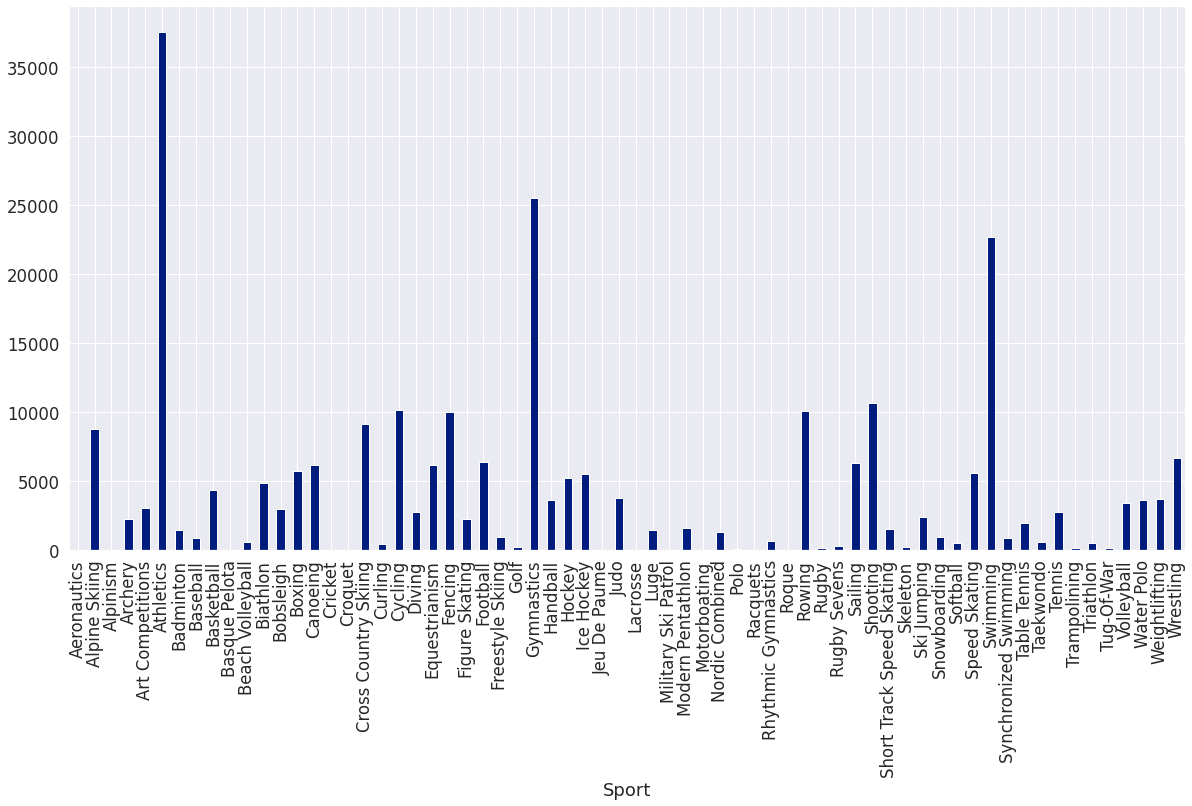

In [90]:
#First of all let's see what kind of sports branches we have in our Olympics dataset.

plt.figure(figsize=(20,10))
df.groupby("Sport").size().plot(kind='bar')

In [89]:
#Let's check if our hypothesis is correct for the people who are older than 60 years old and win gold medal.

df[(df['Medal'] =='Gold') & (df['Age'] > 60)]

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal,Team_country
ID,,,,,,,,,,,,,
52626,Isaac Lazarus Israls,M,63.0,NaN,70.712603,Netherlands,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands / NED
53238,Charles Jacobus,M,64.0,NaN,70.712603,United States,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold,United States / USA
95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,70.712603,Cincinnati Archers,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,Cincinnati Archers / USA
113773,"Galen Carter ""G. C."" Spencer",M,63.0,165.0,70.712603,Potomac Archers,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,Potomac Archers / USA
117046,Oscar Gomer Swahn,M,64.0,NaN,70.712603,Sweden,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden / SWE
130662,"Robert W. Williams, Jr.",M,63.0,NaN,70.712603,Potomac Archers,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,Potomac Archers / USA


**Result: Based on our analysis, this hypothesis is true. There are many sports that contain a high amount of physical activity such as basketball, football, and boxing. However, the gold medal winners who are older than 60 years old did not get any medals in those branches.**

-

**Question: Tall people attend to the Olympics in the sports that they can use the advantage of their height (such as basketball). Is this correct?**

In [103]:
df.Height.sort_values(ascending=False)

ID
132627    226.0
132627    226.0
132627    226.0
104059    223.0
104059    223.0
          ...  
135539      NaN
135542      NaN
135542      NaN
135552      NaN
135561      NaN
Name: Height, Length: 261642, dtype: float64

In [99]:
df[df['Height'] >220]

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal,Team_country
ID,,,,,,,,,,,,,
9407,Gunther Behnke,M,29.0,221.0,114.0,Germany,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Germany / GER
16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver,United States / USA
30409,Roberto Dueas Hernndez,M,24.0,221.0,137.0,Spain,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,Spain / ESP
30409,Roberto Dueas Hernndez,M,28.0,221.0,137.0,Spain,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN,Spain / ESP
104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold,Soviet Union / URS
104059,Arvydas Romas Sabonis,M,27.0,223.0,122.0,Lithuania,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze,Lithuania / LTU
104059,Arvydas Romas Sabonis,M,31.0,223.0,122.0,Lithuania,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze,Lithuania / LTU
132627,Yao Ming,M,20.0,226.0,141.0,China,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,China / CHN
132627,Yao Ming,M,23.0,226.0,141.0,China,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN,China / CHN


**Result: All Olympics athletes who are taller than 220 cm got their gold medal in basketball. Therefore, the hypothesis is true.**

-

**Question: In which season more Olympics games have been held?**

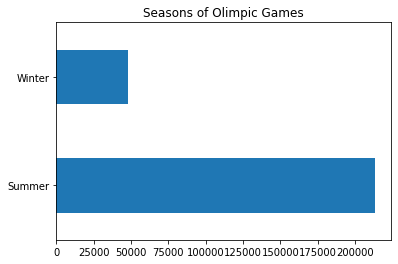

In [48]:
df["Season"].value_counts().plot.barh().set_title("Seasons of Olimpic Games");

In [49]:
summer_olympic = df[df.Season=='Summer']
summer_sports = len(summer_olympic[['Sport']].drop_duplicates())
summer_events = len(summer_olympic[['Event']].drop_duplicates())
print(f'{summer_sports} sports is played in {summer_events} events in summer.')

52 sports is played in 643 events in summer.


In [50]:
winter_olympic = df[df.Season=='Winter']
winter_sports = len(winter_olympic[['Sport']].drop_duplicates())
winter_events = len(winter_olympic[['Event']].drop_duplicates())
print(f'{winter_sports} sports is played in {winter_events} events in winter.')

17 sports is played in 119 events in winter.


**Question: What is the most played sports in the Olympics dataset?**

In [112]:
df.Sport.value_counts().index

Index(['Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling', 'Rowing',
       'Fencing', 'Cross Country Skiing', 'Alpine Skiing', 'Wrestling',
       'Football', 'Sailing', 'Equestrianism', 'Canoeing', 'Boxing',
       'Speed Skating', 'Ice Hockey', 'Hockey', 'Biathlon', 'Basketball',
       'Judo', 'Weightlifting', 'Water Polo', 'Handball', 'Volleyball',
       'Art Competitions', 'Bobsleigh', 'Tennis', 'Diving', 'Ski Jumping',
       'Figure Skating', 'Archery', 'Table Tennis', 'Modern Pentathlon',
       'Short Track Speed Skating', 'Luge', 'Badminton', 'Nordic Combined',
       'Freestyle Skiing', 'Snowboarding', 'Synchronized Swimming', 'Baseball',
       'Rhythmic Gymnastics', 'Taekwondo', 'Beach Volleyball', 'Triathlon',
       'Softball', 'Curling', 'Rugby Sevens', 'Golf', 'Skeleton',
       'Trampolining', 'Tug-Of-War', 'Rugby', 'Polo', 'Lacrosse',
       'Military Ski Patrol', 'Cricket', 'Alpinism', 'Croquet', 'Motorboating',
       'Racquets', 'Jeu De Paume', 'Roque'

In [106]:
df.groupby("Sport").Name.agg(["count"])

,count
Sport,
Aeronautics,1
Alpine Skiing,8751
Alpinism,16
Archery,2254
Art Competitions,3071
...,...
Tug-Of-War,126
Volleyball,3395
Water Polo,3646


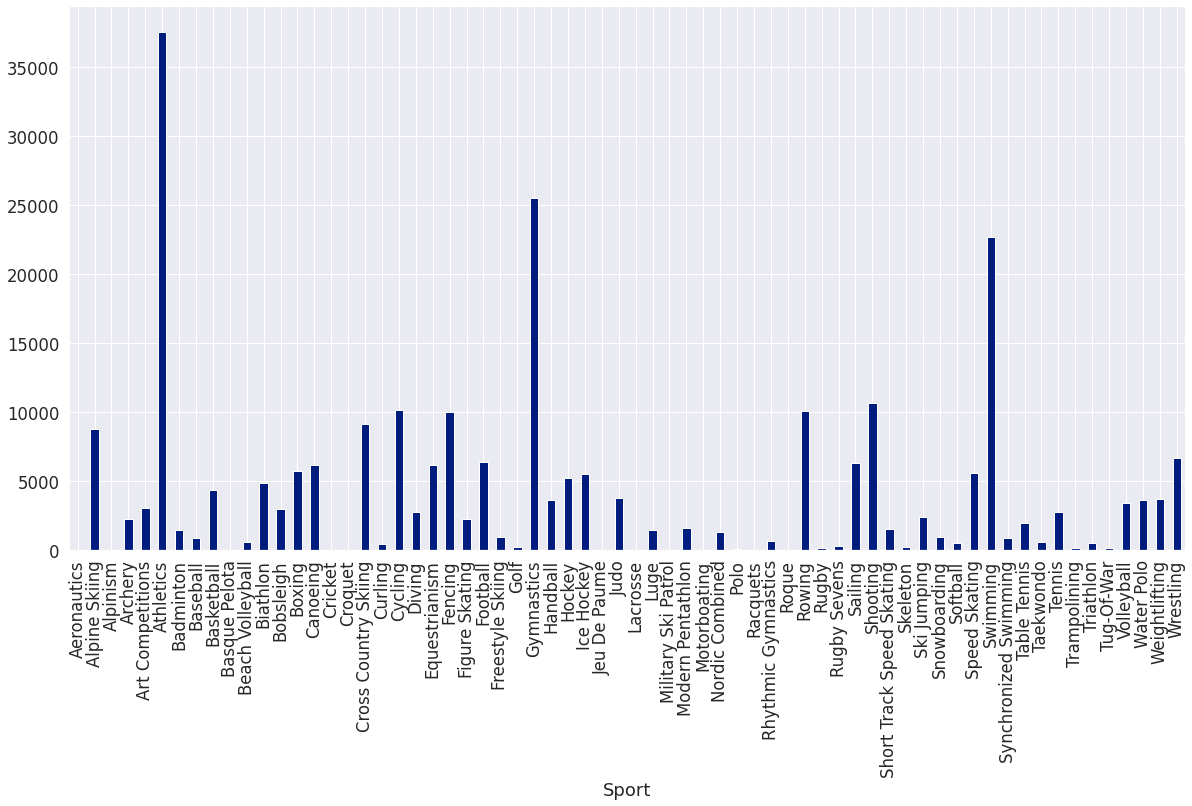

In [105]:
#Let's see the all sports and check which one was played most frequently 

plt.figure(figsize=(20,10))
df.groupby("Sport").size().plot(kind='bar')

In [53]:
#Now we will focus on only Athletic among the all sports 

athletics = df.loc[df["Sport"] =="Athletics"]
athletics.head(2)

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal,Team_country
ID,,,,,,,,,,,,,
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.712603,Netherlands,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands / NED
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.712603,Netherlands,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands / NED


In [54]:
athletics[["Name", "Sex","Age","Height","Medal"]]

,Name,Sex,Age,Height,Medal
ID,,,,,
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN
18,Timo Antero Aaltonen,M,31.0,189.0,NaN
31,Evald rma (rman-),M,24.0,174.0,NaN
32,Olav Augunson Aarnes,M,23.0,NaN,NaN
...,...,...,...,...,...
135553,Galina Ivanovna Zybina (-Fyodorova),F,29.0,168.0,NaN
135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,Bronze
135561,Frantiek Zyka,M,26.0,NaN,NaN


In [55]:
#Let's see how many female and male participated the Olympics in Athletics in total

athletics.groupby("Sex").Age.agg(["count"])

,count
Sex,
F,11622
M,25885


In [56]:
athletics.head()

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal,Team_country
ID,,,,,,,,,,,,,
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.712603,Netherlands,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands / NED
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.712603,Netherlands,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands / NED
18,Timo Antero Aaltonen,M,31.0,189.0,130.000000,Finland,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland / FIN
31,Evald rma (rman-),M,24.0,174.0,70.000000,Estonia,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN,Estonia / EST
32,Olav Augunson Aarnes,M,23.0,NaN,70.712603,Norway,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN,Norway / NOR


**Question: Find the 5 most successful teams of countries of all times in the Olympics.**

In [63]:
most_successful_5 = df.Team_country.value_counts().head(5)
most_successful_5

United States / USA    17610
France / FRA           10877
Great Britain / GBR    10731
Italy / ITA             9922
Germany / GER           9180
Name: Team_country, dtype: int64

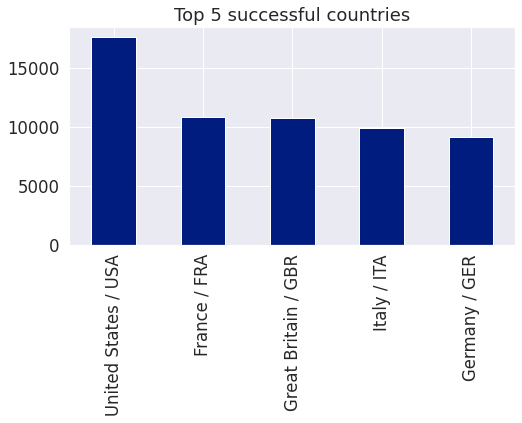

In [107]:
most_successful_5.plot(kind = "bar", figsize=(8, 4))
plt.title("Top 5 successful countries")
plt.show()